# Exploratory Data Analysis of IPAGE Soil Data


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data and Overview

In [16]:
df = pd.read_csv('./2410_iPAGE_SoilData_241029.csv')
df.head()

Area soil group   Land class knit (surface)   pH  SOC (%)  \
0  Mithpukur      belab  high ground     Clay loam   5.0     1.27   
1  Mithpukur      belab  high ground     Clay loam   4.9     1.47   
2  Mithpukur      belab  high ground     Clay loam   4.6     1.07   
3  Mithpukur      belab  high ground     Clay loam   5.2     1.51   
4  Mithpukur      belab  high ground     Clay loam   5.3     1.08   

  Nitrogen N (%) Potassium K (meq/100) Phosphorus P (ug/g) Sulfur S (ug/g)  \
0           0.08                  0.15                19.6            37.7   
1           0.09                  0.25                 4.1            32.0   
2           0.05                  0.09                13.3            13.5   
3           0.06                  0.30                20.2            30.0   
4           0.11                  0.17                20.5            27.8   

  Boron B (ug/g) Zinc Zn (ug/g)  
0           0.26           0.86  
1           0.25           0.75  
2           0.27           0.95  
3           0.28            1.0  
4           0.30           1.04

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   soil group             618 non-null    object 
 2   Land class             618 non-null    object 
 3   knit (surface)         461 non-null    object 
 4   pH                     618 non-null    object 
 5   SOC (%)                618 non-null    float64
 6   Nitrogen N (%)         618 non-null    object 
 7   Potassium K (meq/100)  618 non-null    object 
 8   Phosphorus P (ug/g)    618 non-null    object 
 9   Sulfur S (ug/g)        618 non-null    object 
 10  Boron B (ug/g)         618 non-null    object 
 11  Zinc Zn (ug/g)         618 non-null    object 
dtypes: float64(1), object(11)
memory usage: 58.1+ KB


In [52]:
# The numerical data mostly loaded as the wrong data type so I will change those
# Also grouping numerical and categorical variables

numerical_cols = ['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)', 
              'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)', 
              'Zinc Zn (ug/g)']

categorical_cols = ['Area', 'soil group', 'Land class', 'knit (surface)']

# Convert columns to float64
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 0 to 520
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   454 non-null    object 
 1   soil group             454 non-null    object 
 2   Land class             454 non-null    object 
 3   knit (surface)         454 non-null    object 
 4   pH                     454 non-null    float64
 5   SOC (%)                454 non-null    float64
 6   Nitrogen N (%)         454 non-null    float64
 7   Potassium K (meq/100)  454 non-null    float64
 8   Phosphorus P (ug/g)    454 non-null    float64
 9   Sulfur S (ug/g)        454 non-null    float64
 10  Boron B (ug/g)         454 non-null    float64
 11  Zinc Zn (ug/g)         454 non-null    float64
dtypes: float64(8), object(4)
memory usage: 46.1+ KB


In [53]:
df.describe()

pH     SOC (%)  Nitrogen N (%)  Potassium K (meq/100)  \
count  454.000000  454.000000      454.000000             454.000000   
mean     5.173634    1.926339        0.128154               0.377841   
std      0.410818    1.104043        0.588998               3.250709   
min      4.100000    0.140000        0.010000               0.000000   
25%      4.900000    1.460000        0.080000               0.110000   
50%      5.100000    1.780000        0.090000               0.160000   
75%      5.400000    2.250000        0.110000               0.260000   
max      7.200000   20.400000       12.600000              68.000000   

       Phosphorus P (ug/g)  Sulfur S (ug/g)  Boron B (ug/g)  Zinc Zn (ug/g)  
count           454.000000       454.000000      454.000000      454.000000  
mean             28.270374        14.923454        0.438987        1.015330  
std              36.522256        11.049567        1.599805        0.918383  
min               0.060000         0.400000        0.060000        0.080000  
25%               7.600000         7.370000        0.240000        0.570000  
50%              14.500000        12.200000        0.300000        0.830000  
75%              33.550000        19.300000        0.400000        1.127500  
max             254.700000        70.800000       34.000000       10.580000

It looks like we're missing some values for quite a few of the variables, for simplicity I will just drop all samples that are incomplete.

It also appears that there are potentially some outliers for all of the numerical features except for pH.

## 2. Handle Missing Values

In [54]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 0 to 520
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   454 non-null    object 
 1   soil group             454 non-null    object 
 2   Land class             454 non-null    object 
 3   knit (surface)         454 non-null    object 
 4   pH                     454 non-null    float64
 5   SOC (%)                454 non-null    float64
 6   Nitrogen N (%)         454 non-null    float64
 7   Potassium K (meq/100)  454 non-null    float64
 8   Phosphorus P (ug/g)    454 non-null    float64
 9   Sulfur S (ug/g)        454 non-null    float64
 10  Boron B (ug/g)         454 non-null    float64
 11  Zinc Zn (ug/g)         454 non-null    float64
dtypes: float64(8), object(4)
memory usage: 46.1+ KB


## 3. Visualize Distributions

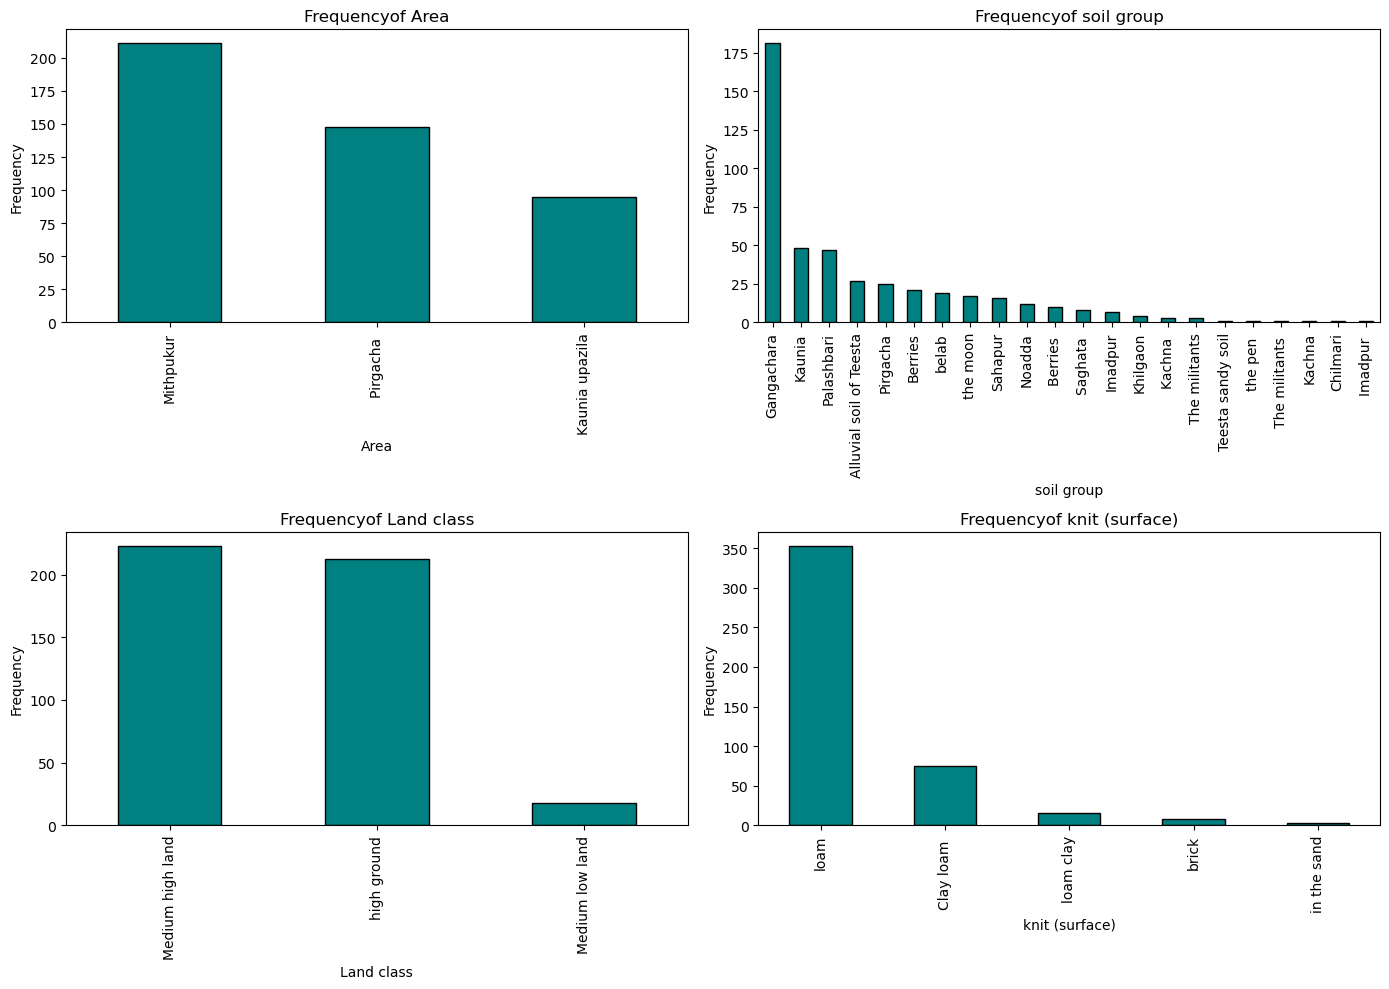

In [61]:
# First we will look at the distribution of the categorical variables

# Plot bar charts for each categorical variable
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  # Adjust rows and columns based on the number of variables
    df[col].value_counts().plot(kind='bar', color='teal', edgecolor='black')
    plt.title(f"Frequencyof {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

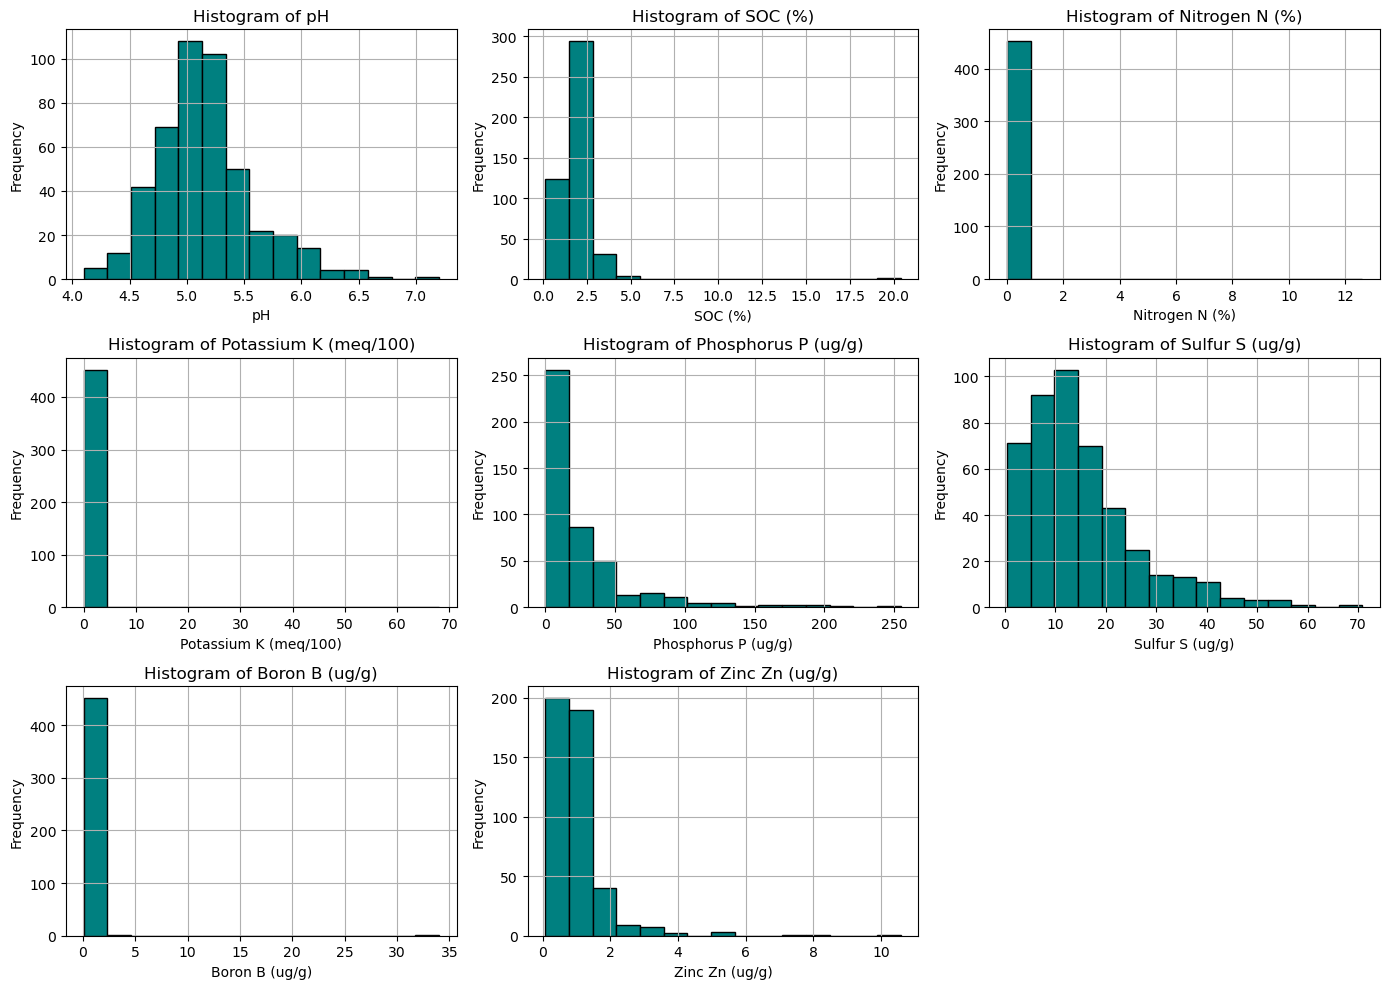

In [56]:
# Plot histograms for each numerical feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    df[col].hist(bins=15, color='teal', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

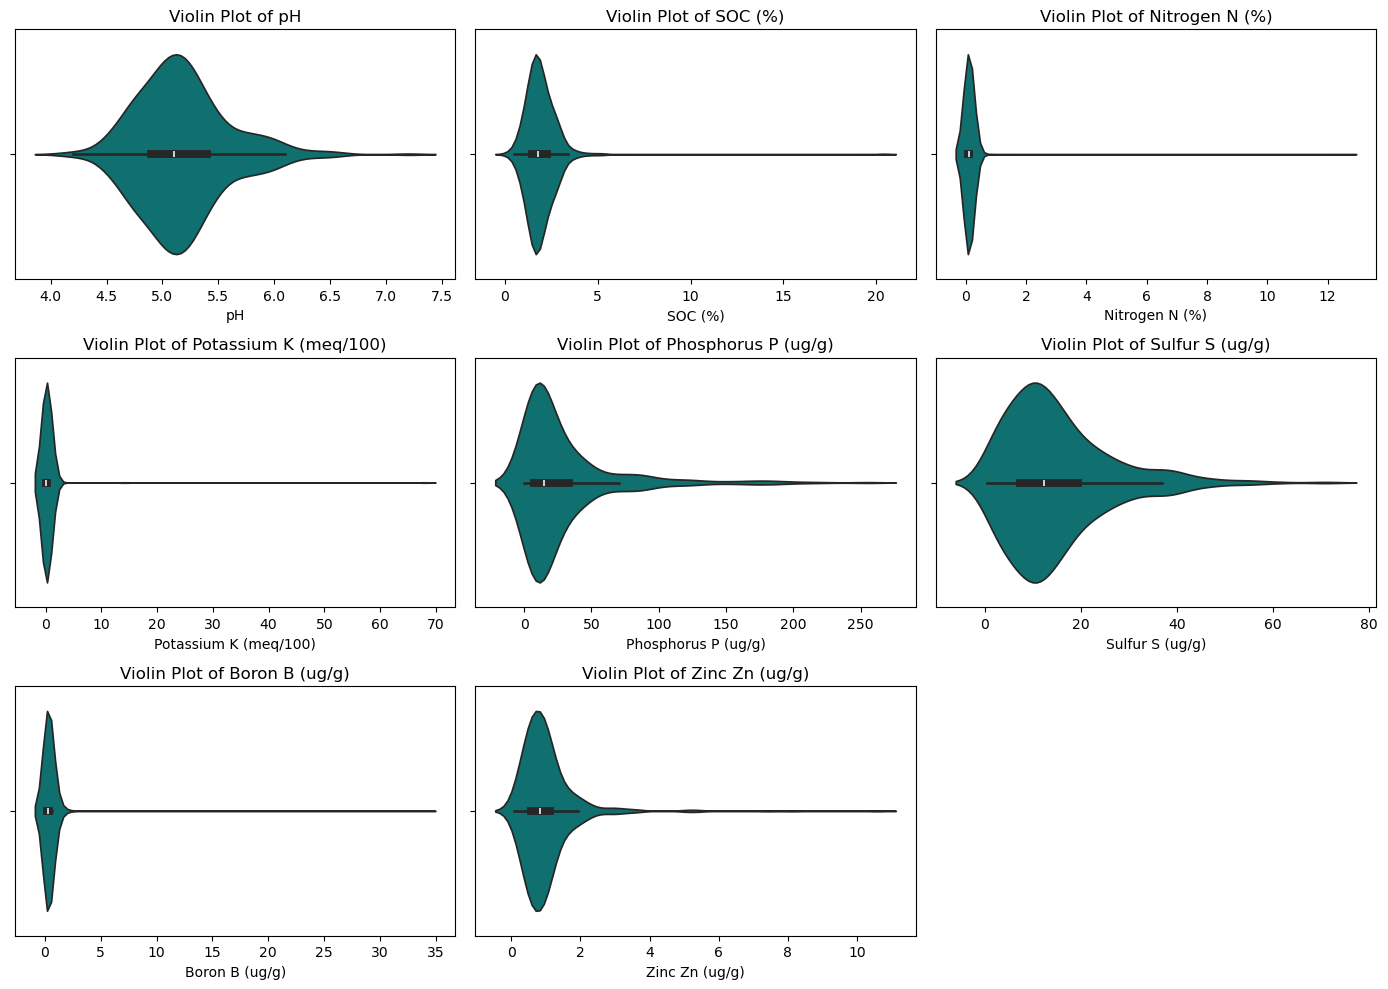

In [57]:
# Plot violin plots for each numerical feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.violinplot(data=df, x=col, color='teal')
    plt.title(f"Violin Plot of {col}")
plt.tight_layout()
plt.show()

It looks like most of the variables have a few extreme outliers that are masking the distribution because of the extreme skew. I'm going to remove those extreme outliers and then revisualize the distributions.

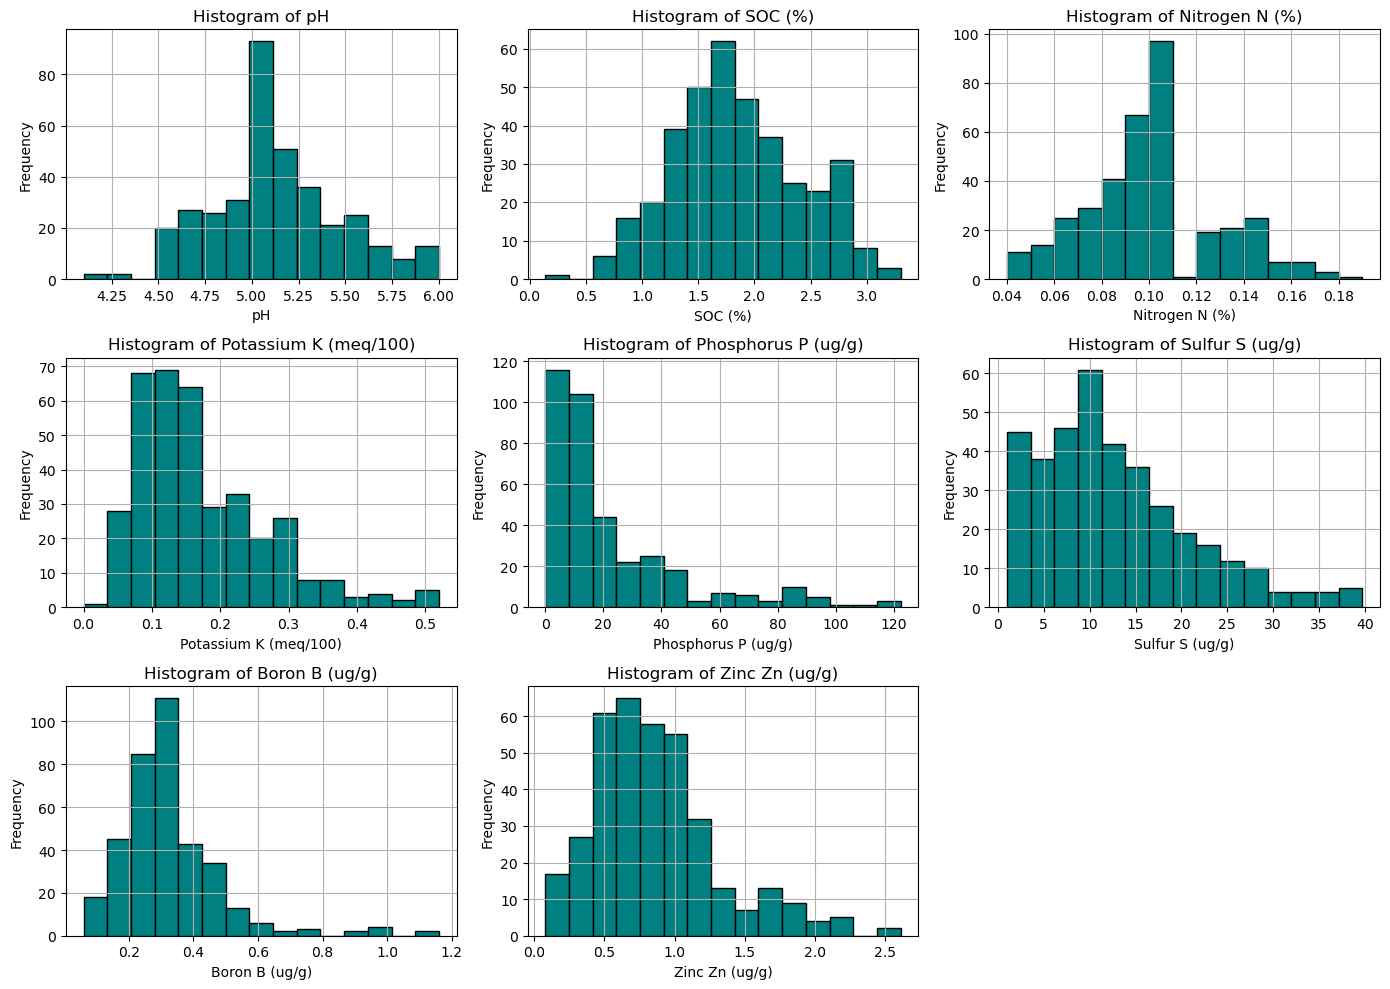

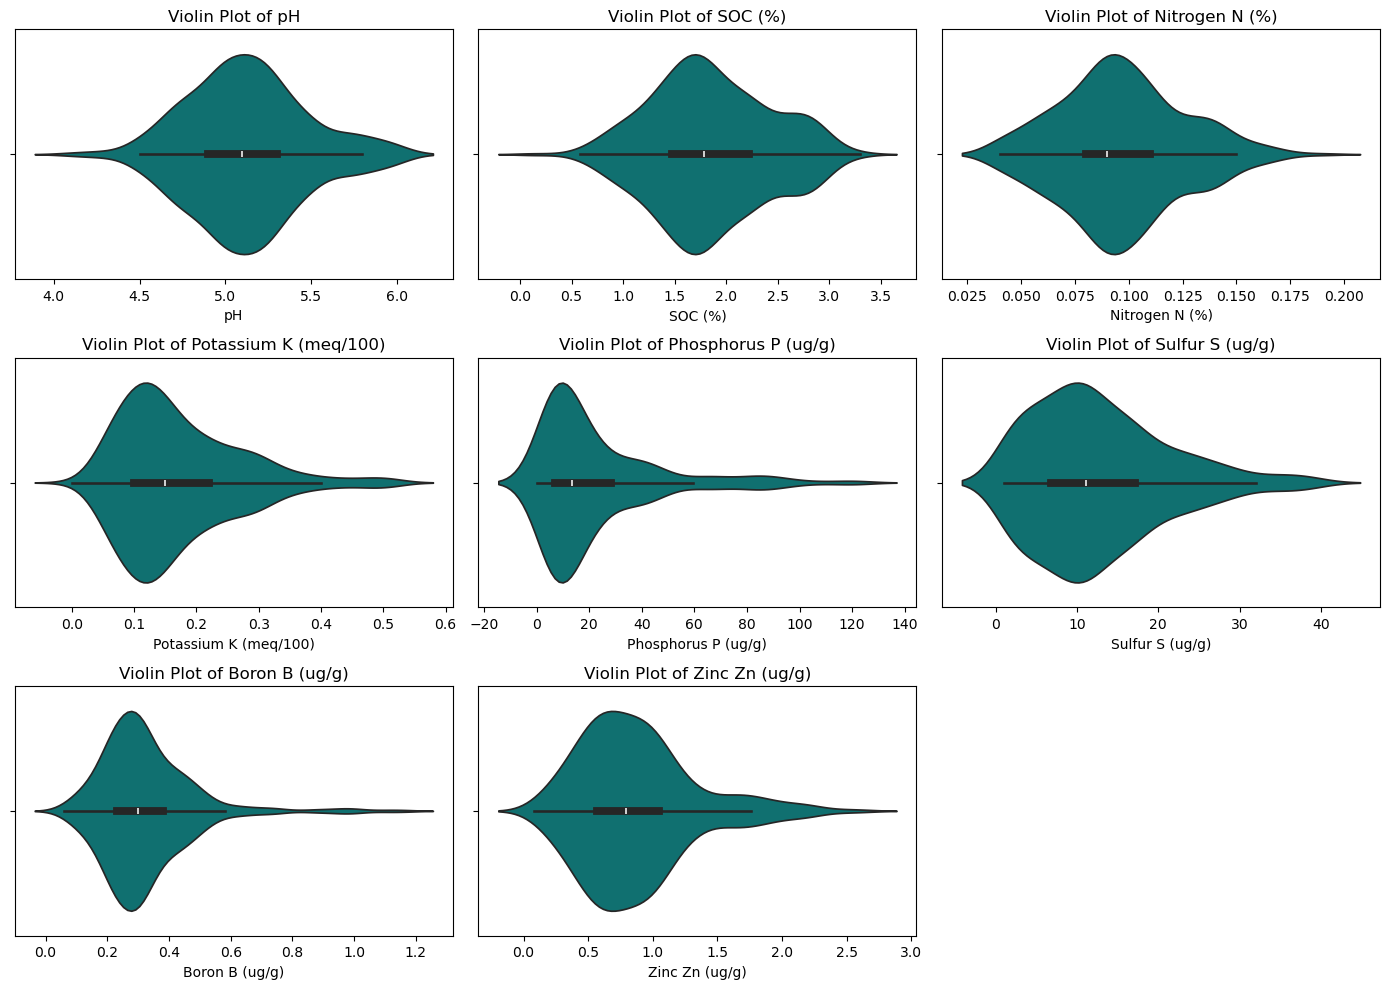

In [58]:
# I'm just going to remove the top 5% of values from the data
# This is just for visualizing purposes so I can see the distributions better

upper_thresh = 0.97

df_trimmed = df.copy()

for col in numerical_cols:
    upper_bound = df[col].quantile(upper_thresh)
    df_trimmed = df_trimmed[(df_trimmed[col] < upper_bound)]

# Plot histograms for each numerical feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    df_trimmed[col].hist(bins=15, color='teal', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot violin plots for each numerical feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.violinplot(data=df_trimmed, x=col, color='teal')
    plt.title(f"Violin Plot of {col}")
plt.tight_layout()
plt.show()

## 4. Correlation Analysis

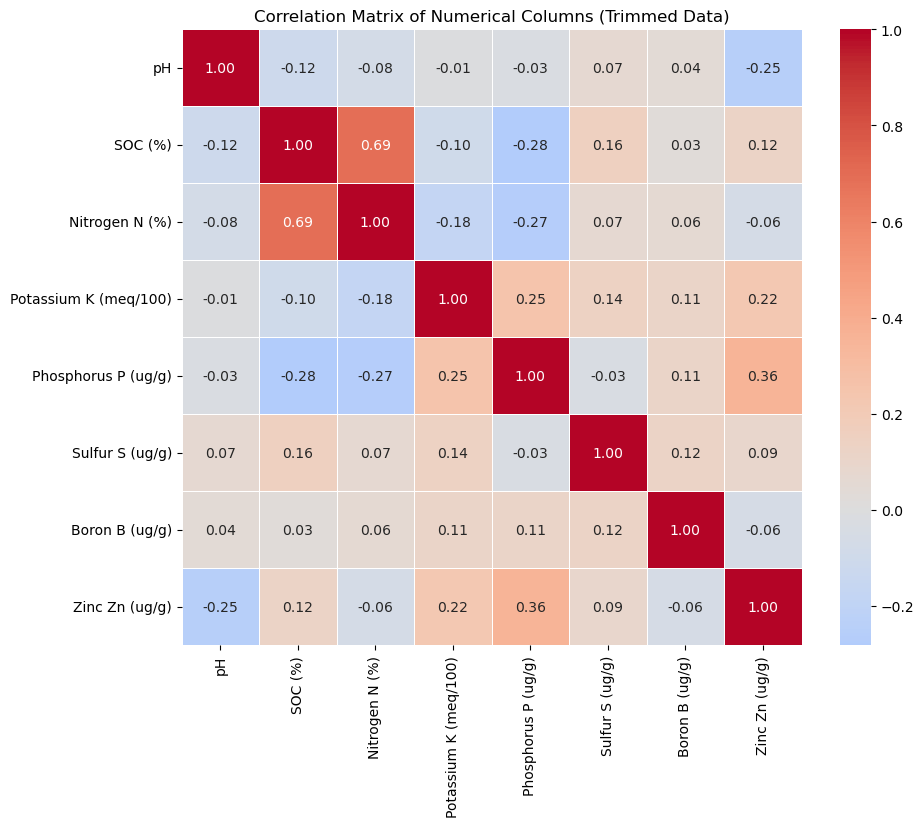

In [60]:
# Calculate the correlation matrix for the numerical columns
corr_matrix = df_trimmed[numerical_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns (Trimmed Data)")
plt.show()

Some of our target variables seem to have some pretty strong correlations with the other variables which is great.

SOC seems to have the strongest positive correlation with Nitrogen and negative correlation with Phosphorus.

Zinc is fairly strongly correlated with Potassium and Phosphorus, while being relatively negatively correlated with pH.

Boron is most strongly correlated with Potassium, Phosphorus and Zinc, but the correlations are fairly weak.


### Let's visualize the correlations of our target variables with a categorical variable overlay to see if there's any patterns that emerge

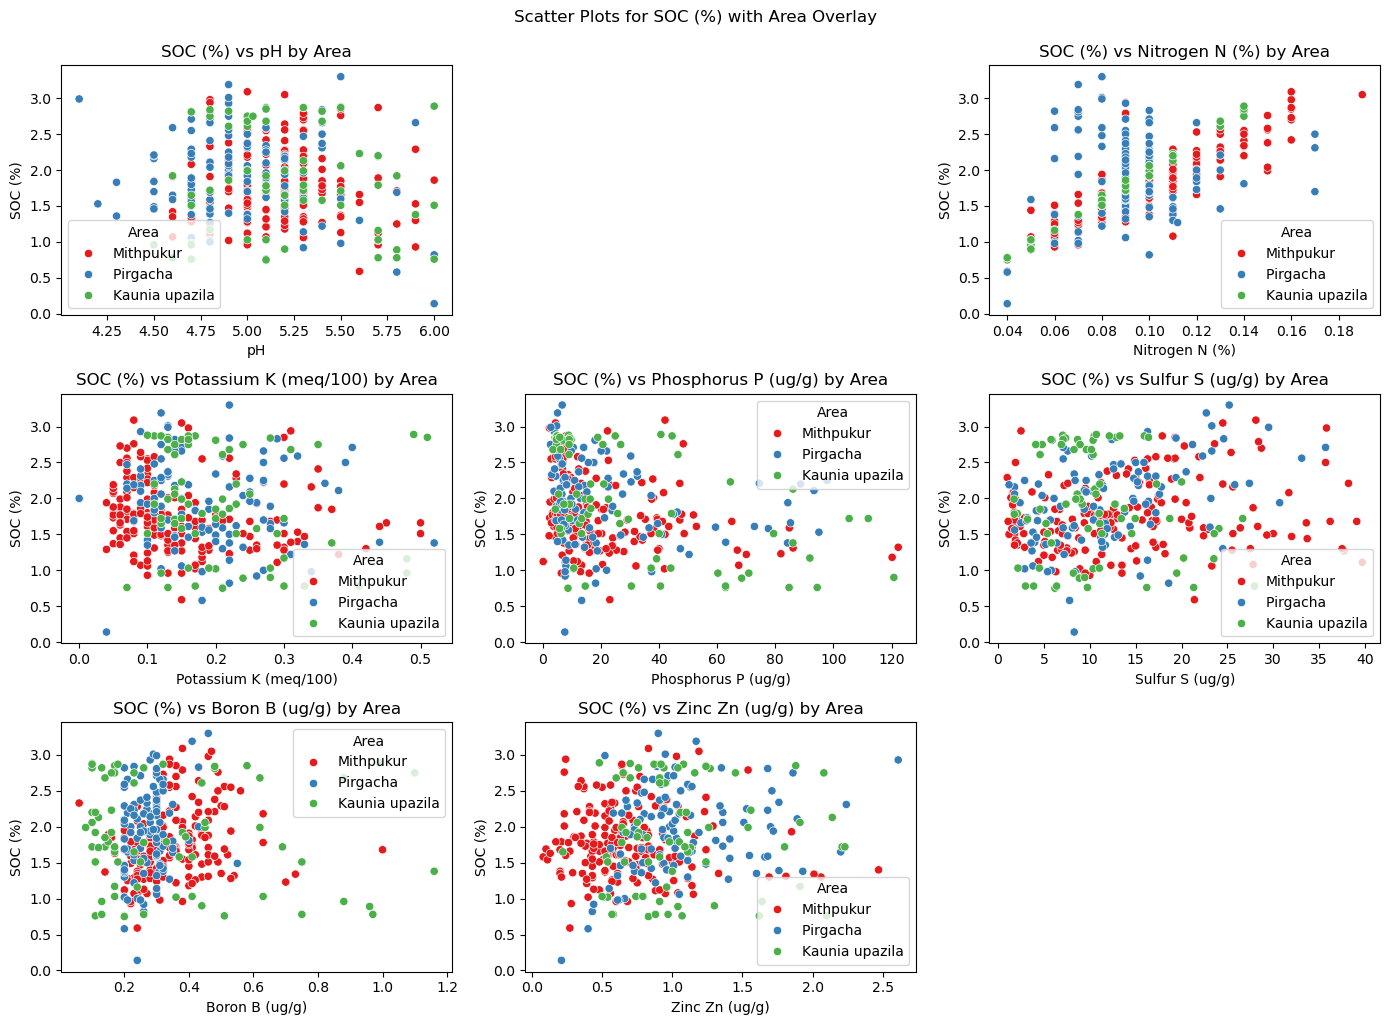

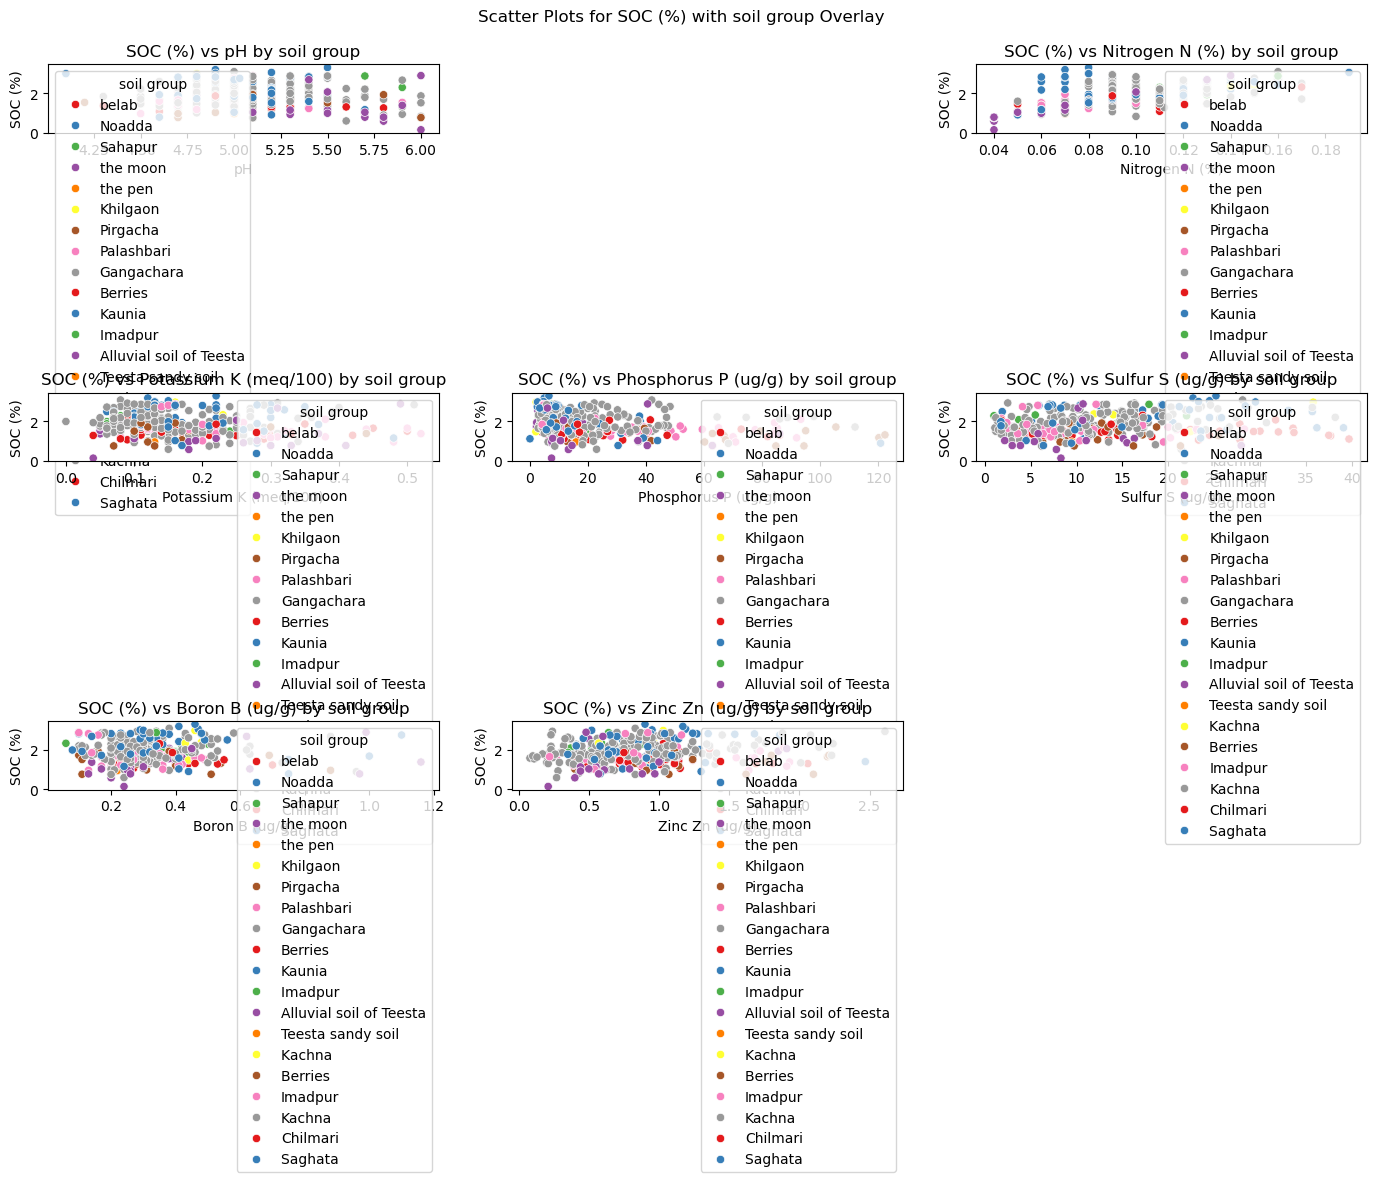

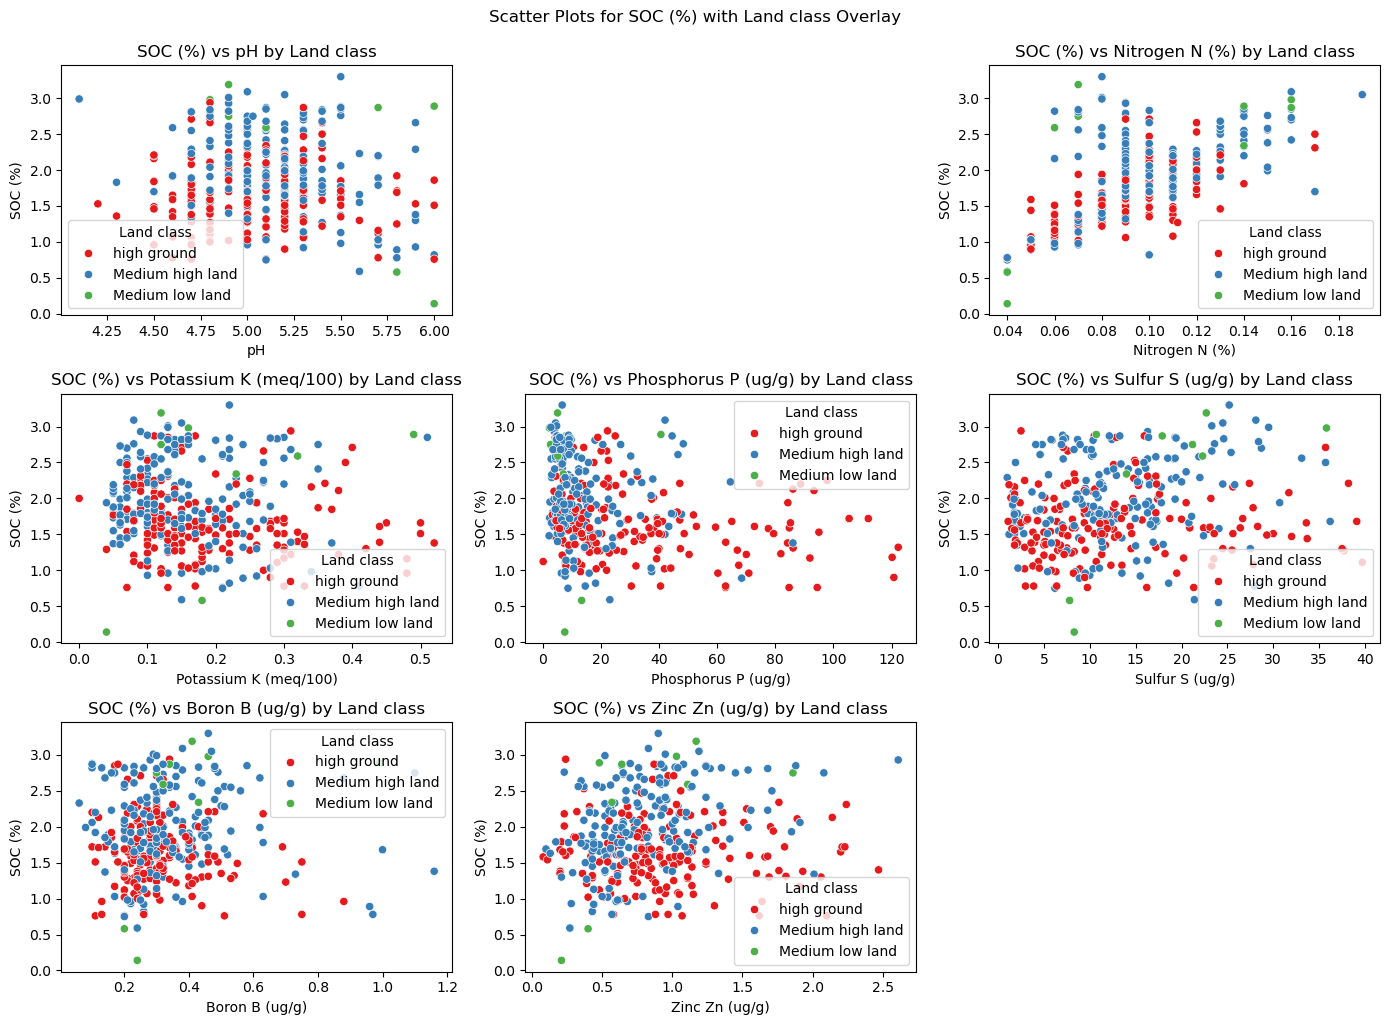

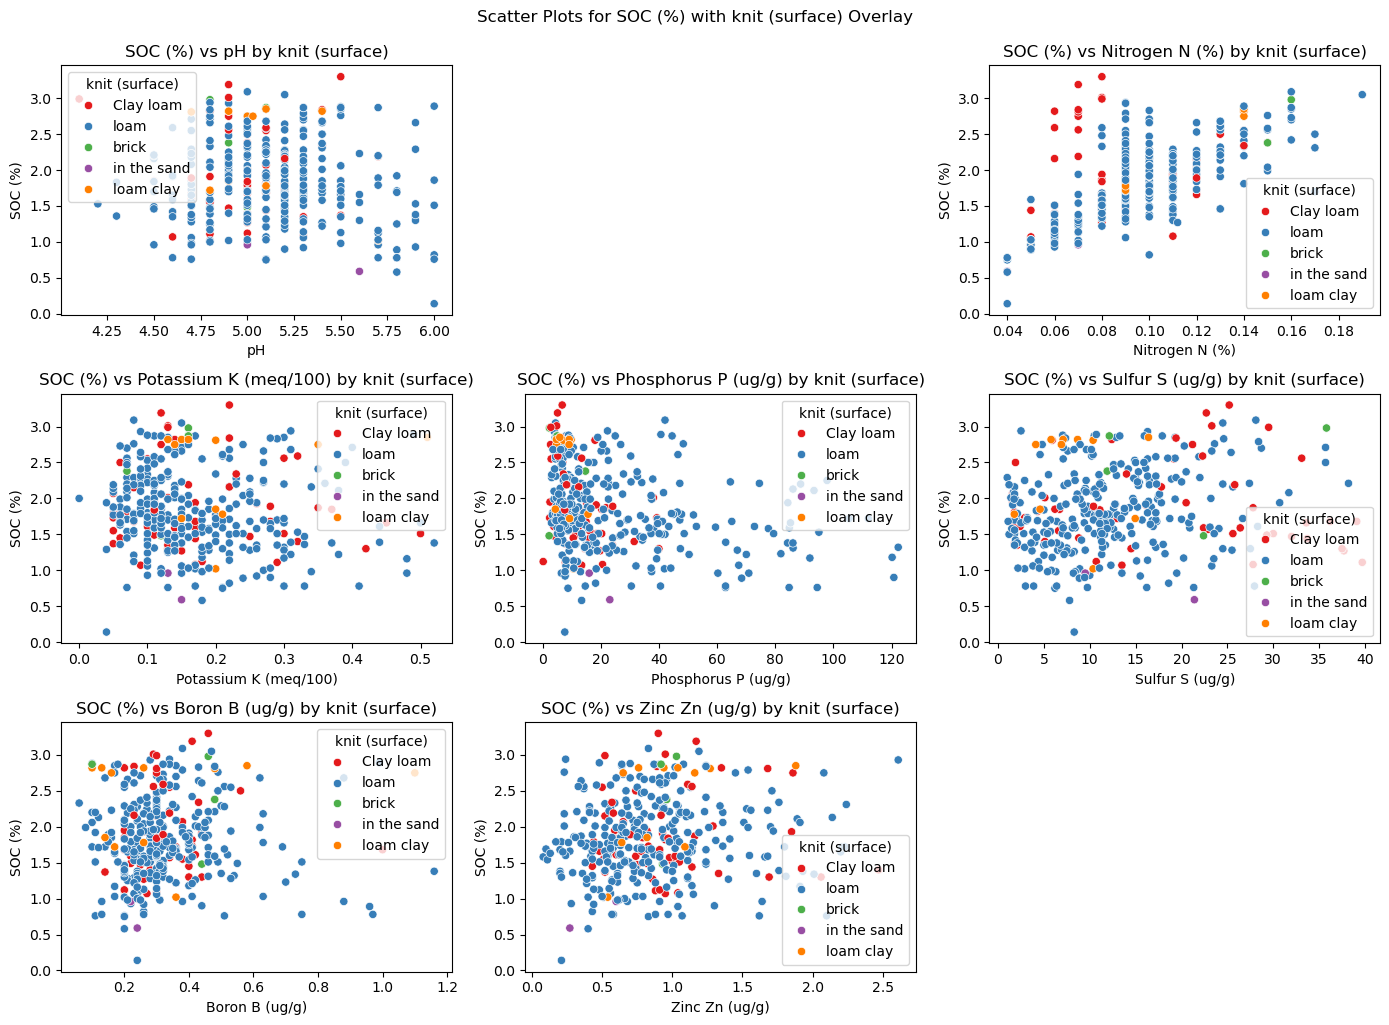

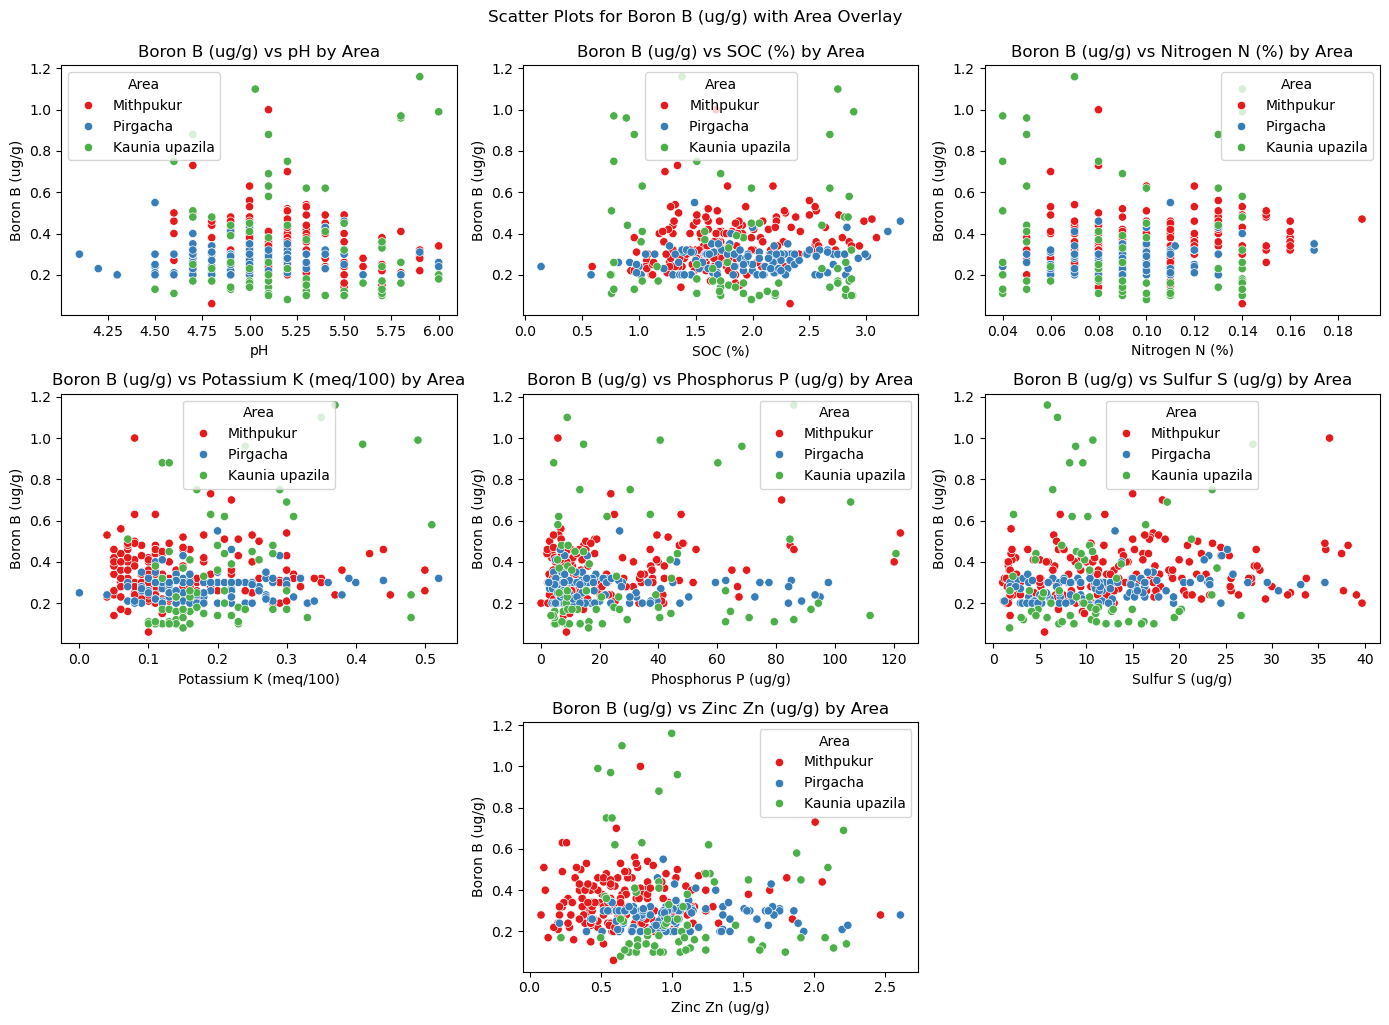

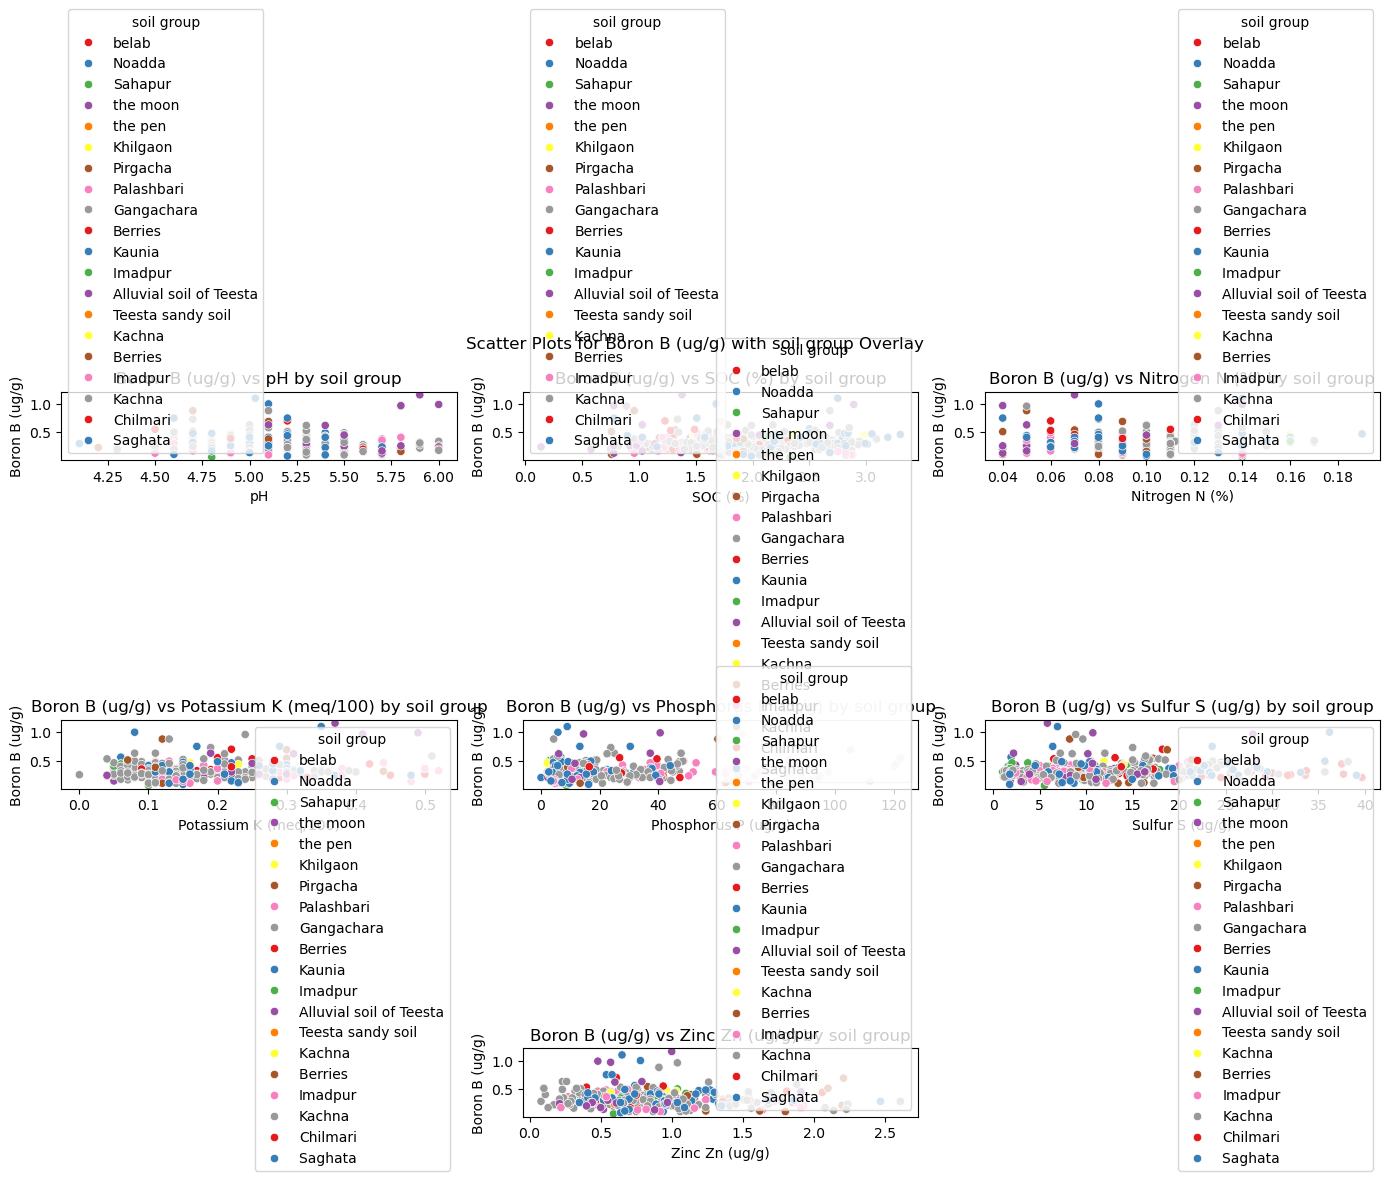

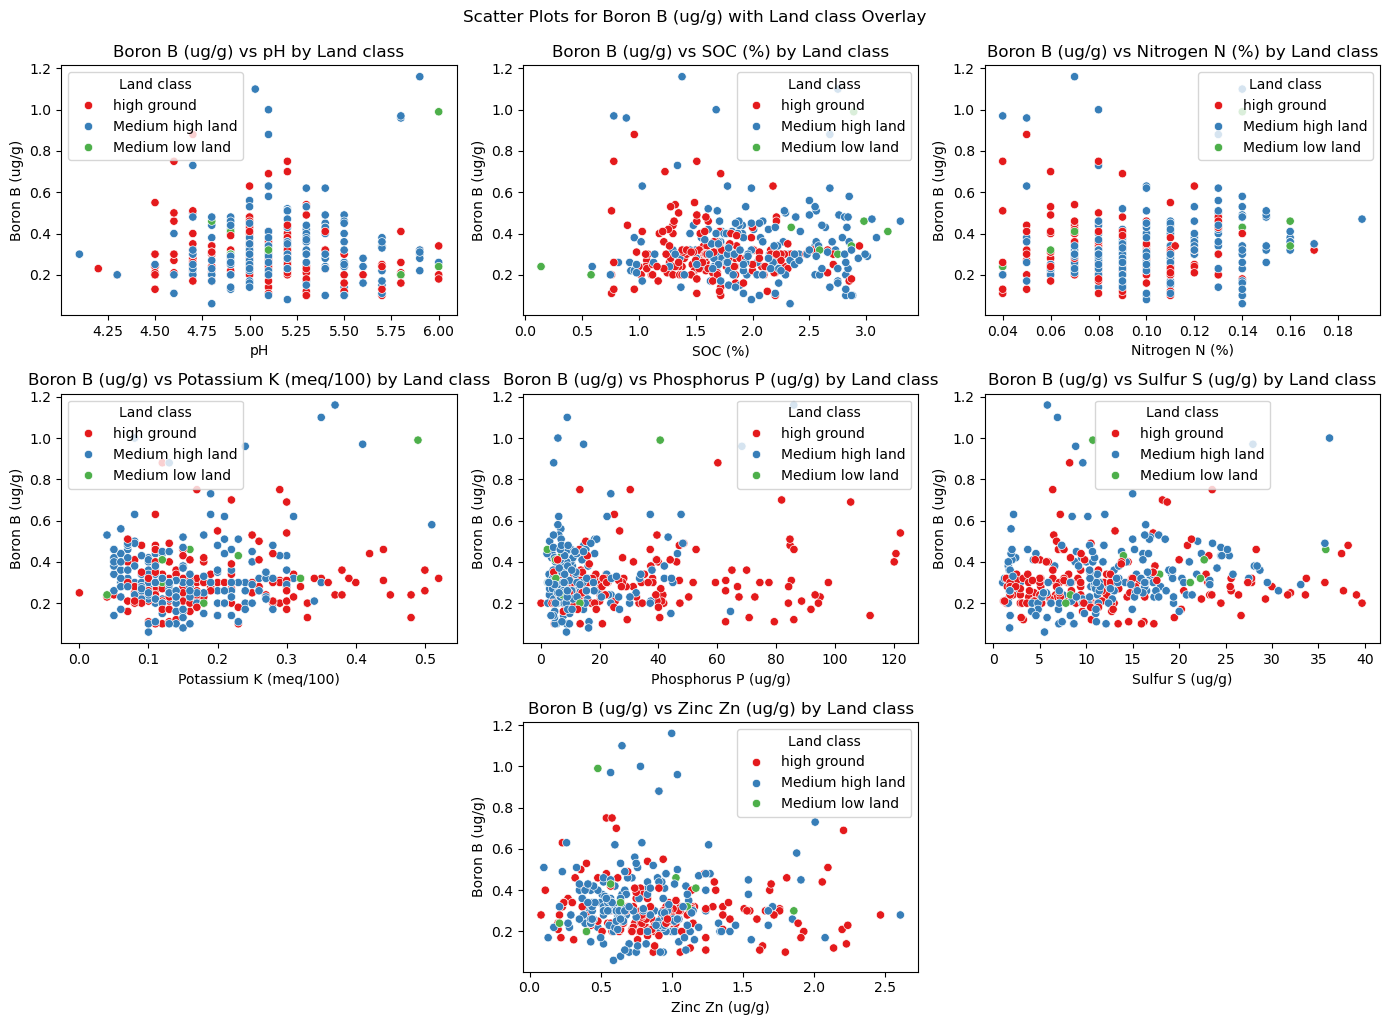

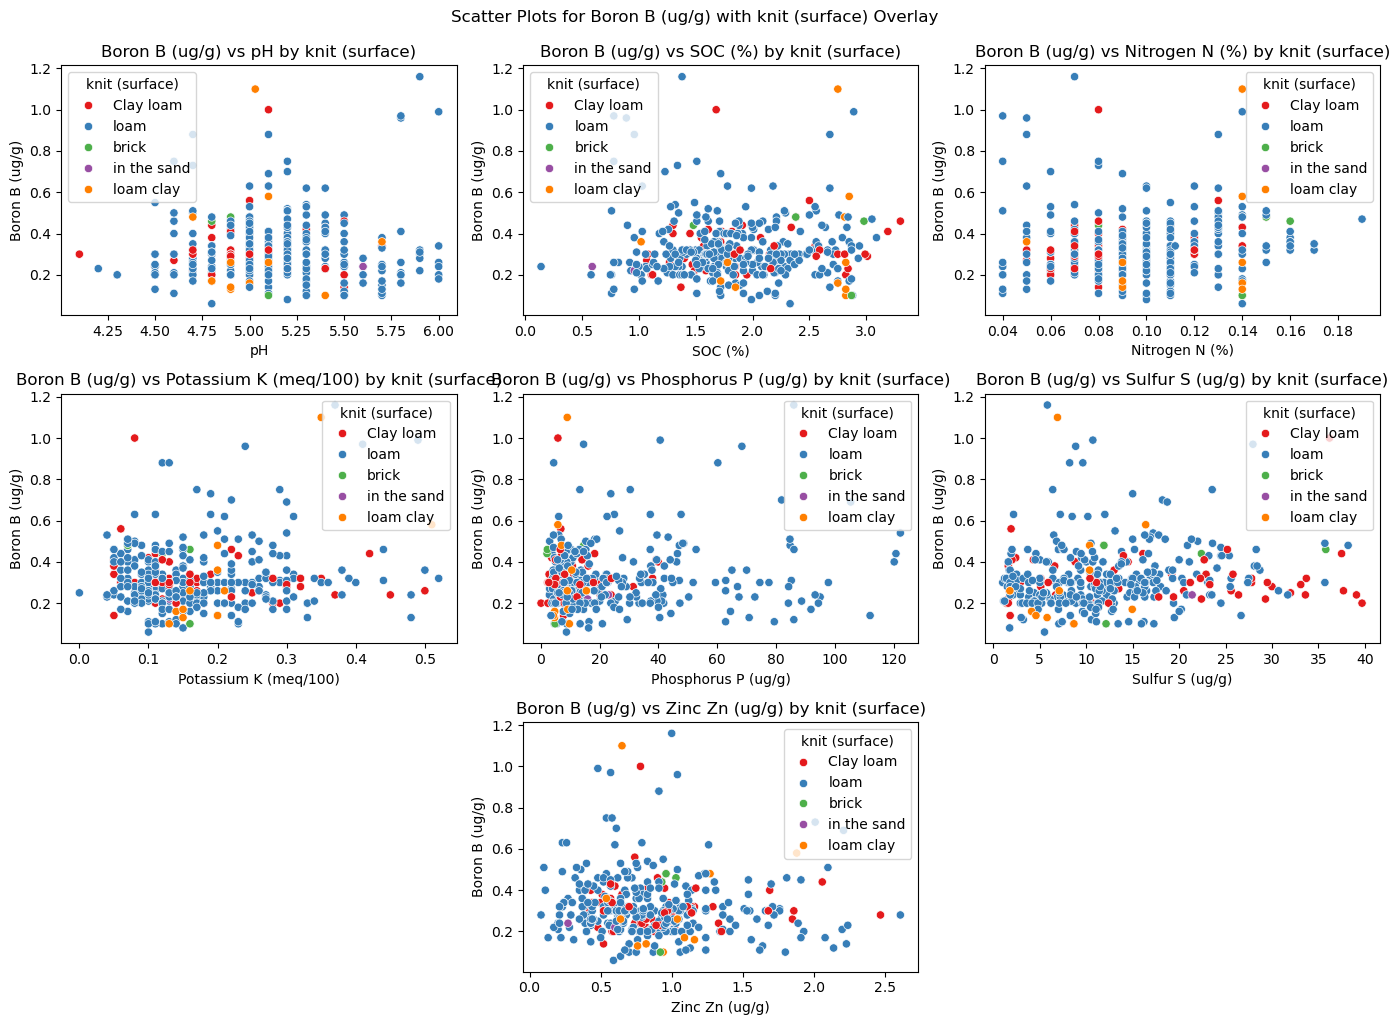

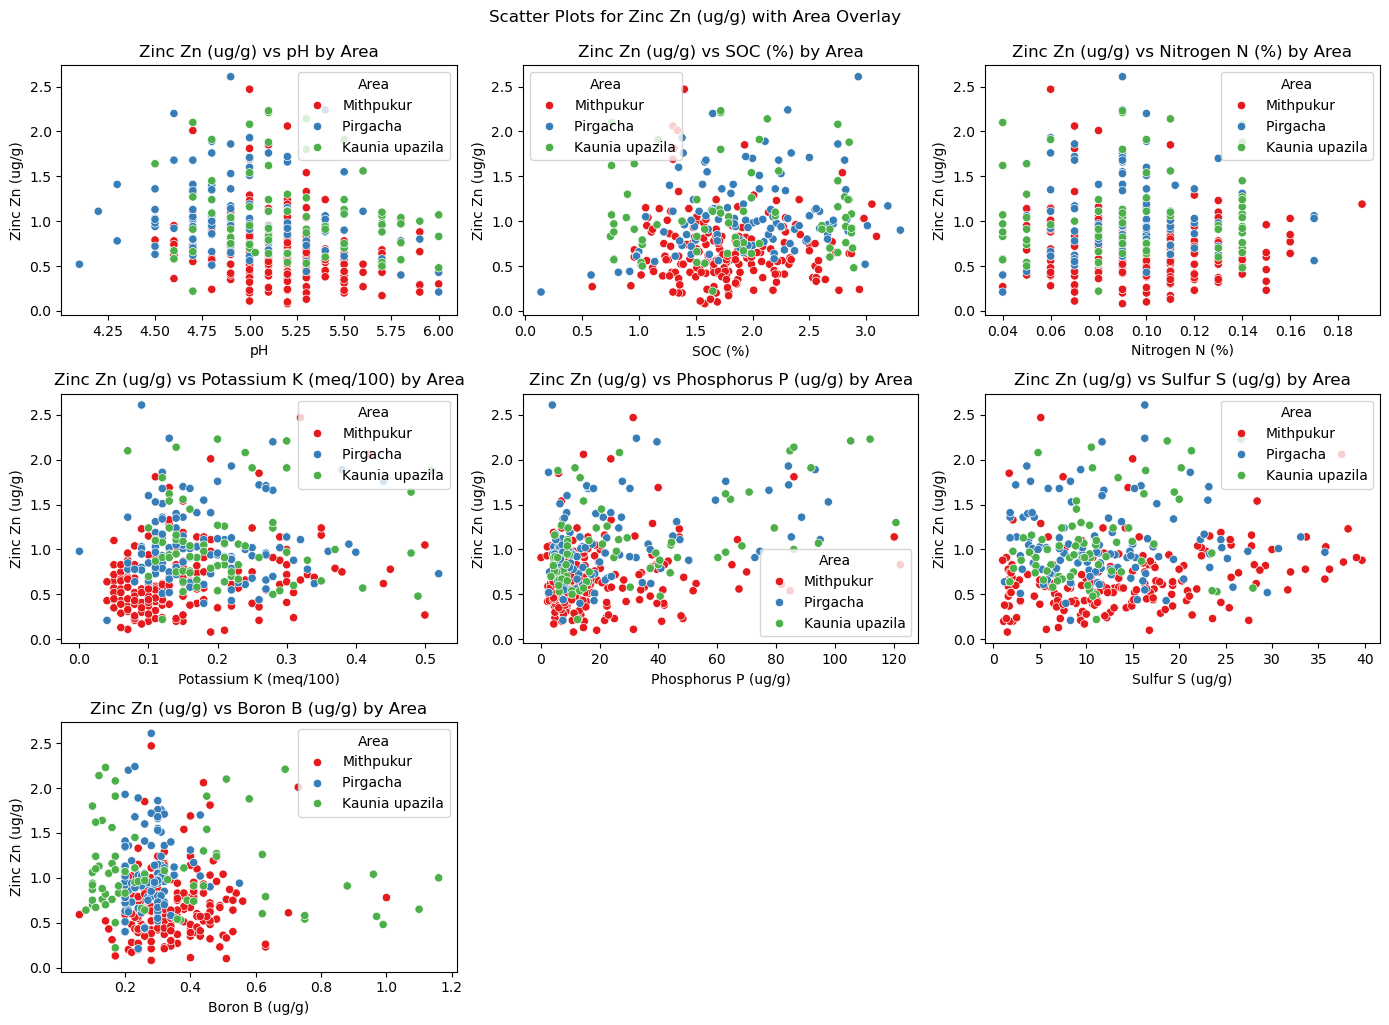

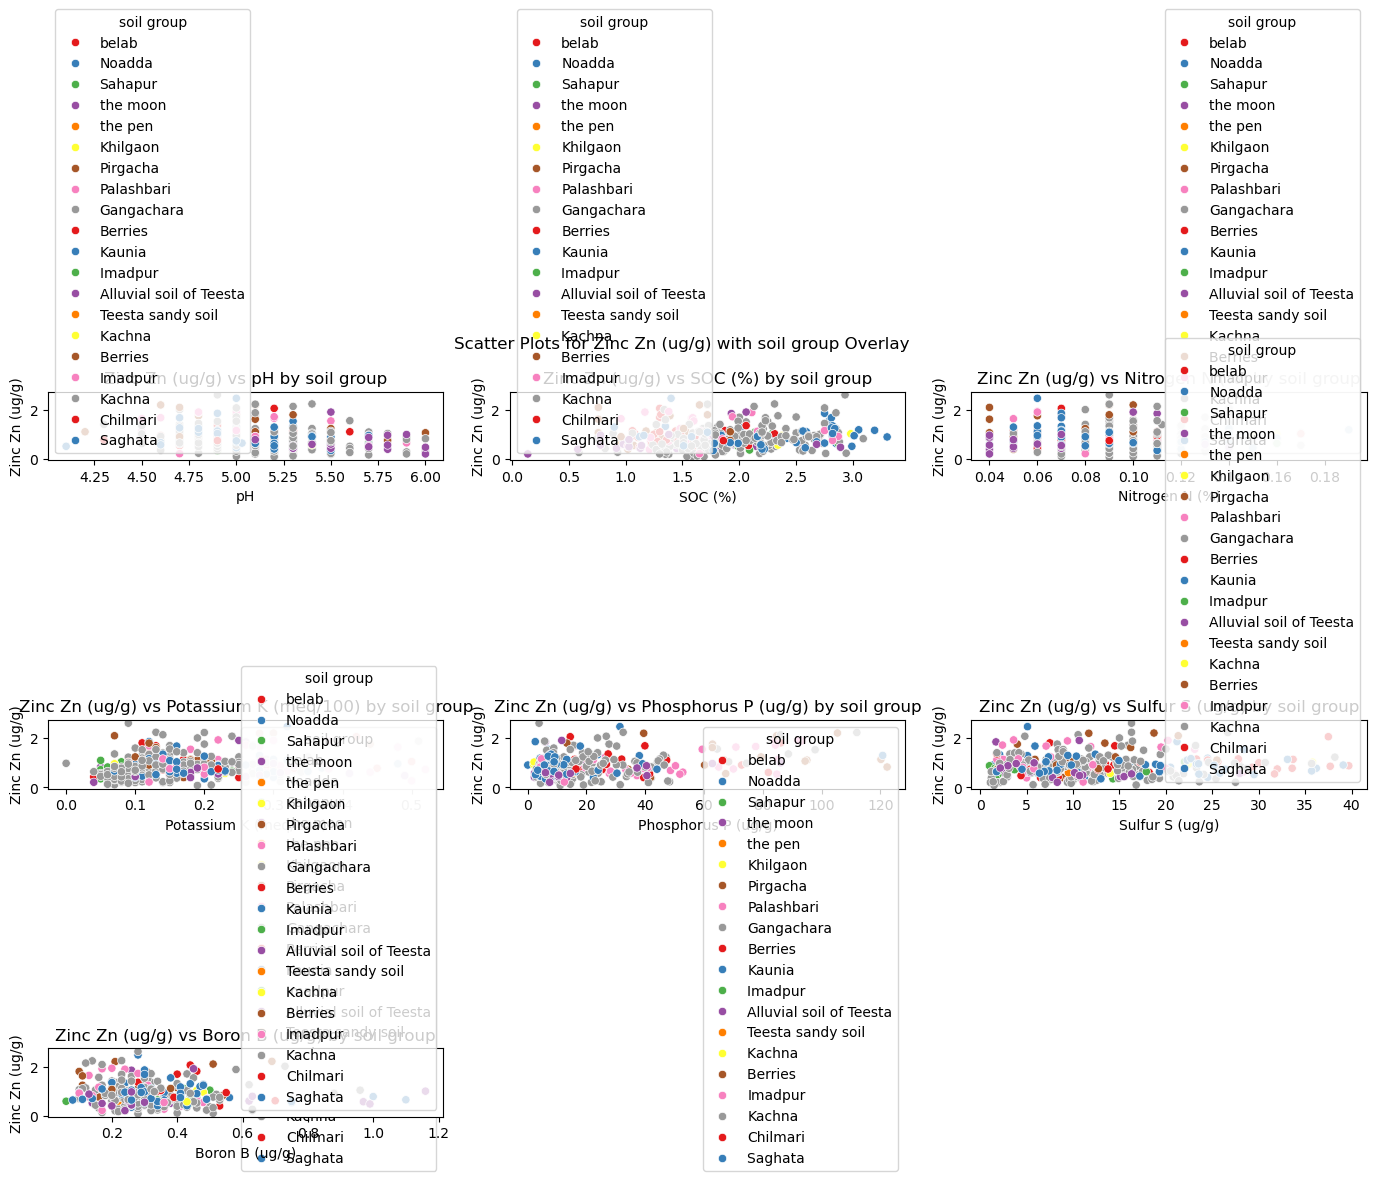

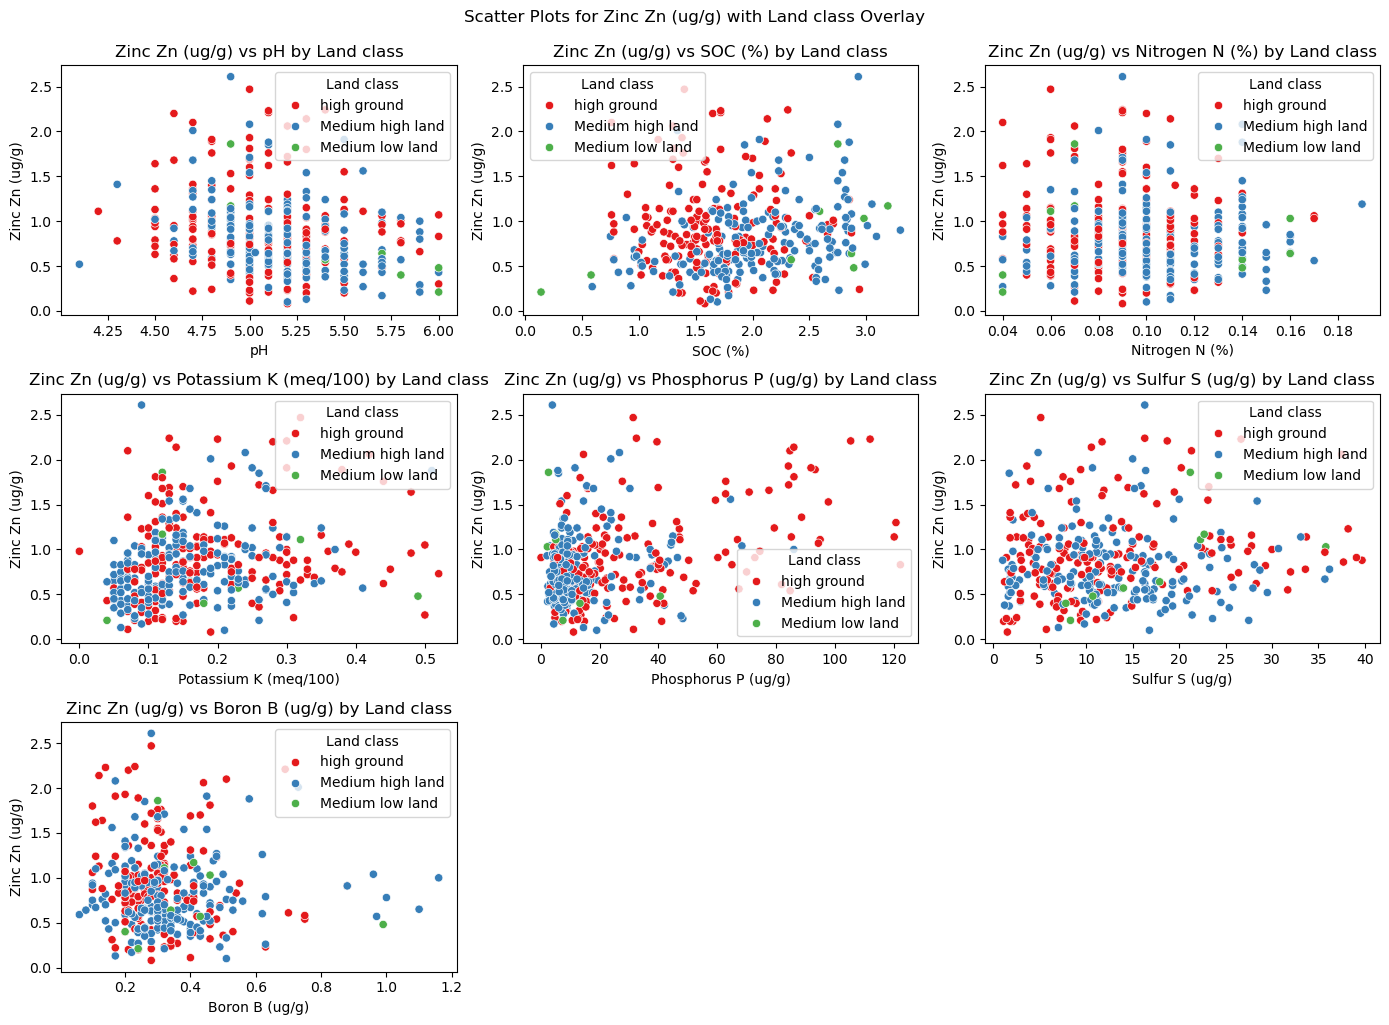

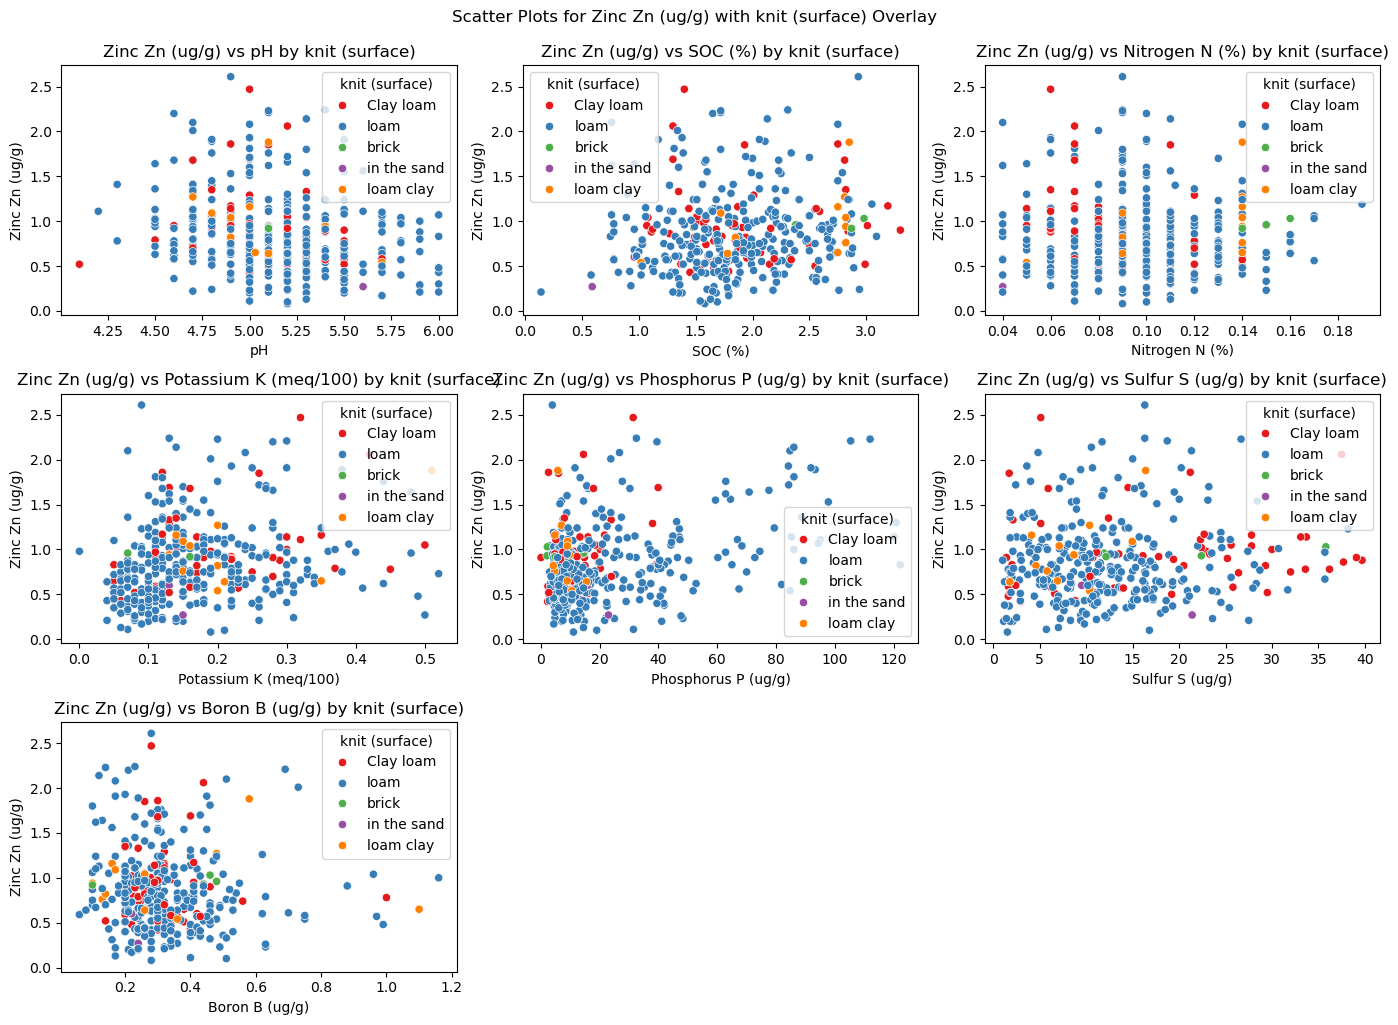

In [64]:
# Define target variables
target_cols = ['SOC (%)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']

# Loop through each target variable and categorical variable
for target in target_cols:
    for categorical in categorical_cols:
        plt.figure(figsize=(14, 10))
        for i, col in enumerate(numerical_cols, 1):
            if col != target:  # Exclude self-plotting of target variable
                plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
                sns.scatterplot(data=df_trimmed, x=col, y=target, hue=categorical, palette='Set1')
                plt.title(f"{target} vs {col} by {categorical}")
                plt.xlabel(col)
                plt.ylabel(target)
        plt.tight_layout()
        plt.suptitle(f"Scatter Plots for {target} with {categorical} Overlay", y=1.02)
        plt.show()

I'm not seeing any really strong patterns emerging between the categorical variables and target variables at this point. Maybe with some feature engineering we can tease out some of the relationships